In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_voltages(tmatrix,current):
    try:
        voltage = np.linalg.solve(tmatrix[1:, 1:], current[1:])
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            print("Hi there, singular matrix here")
            voltage = [0,0,0,0,0]
        else:
            raise
    return [0, *voltage]

def resistance_xx(tmatrix):
    current = [1, 0, 0, -1, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 3)

def resistance_xy(tmatrix):
    current = [1, 0, 0, -1, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 6)

In [3]:
current= [-1, 0, 0, 1, 0, 0]

def tmatrix(l,r):
    return np.array([[l+r,-r,0,0,0,-l], [-l,l+r,-r,0,0,0], [0,-l,l+r,-r,0,0], [0,0,-l,l+r,-r,0], [0,0,0,-l,l+r,-r], [-r,0,0,0,-l,l+r] ])

def pv(l,r):
    plt.scatter(range(1,7), find_voltages(tmatrix(l,r),current))

def rm(l,r):
    return resistance_xx(tmatrix(l,r)), resistance_xy(tmatrix(l,r))

Text(0, 0.5, 'V/I')

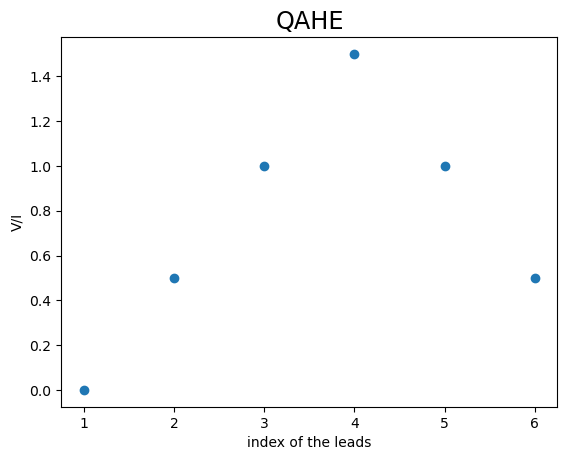

In [6]:
pv(1,1)
plt.title("QAHE", size='xx-large');
plt.xlabel('index of the leads')
plt.ylabel('V/I')